<a href="https://colab.research.google.com/github/LahiWeer/2330902-ML_CW/blob/master/Preprocessing/S4%20-%20Data%20Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install -U imbalanced-learn

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [29]:
# Load the uploaded CSV file to inspect its structure
bank_data_url= 'https://raw.githubusercontent.com/LahiWeer/2330902-ML_CW/refs/heads/master/Preprocessing/Processed%20data%20in%20each%20step/Processed data in each step/processed_bank_data_final.csv'
bank_data = pd.read_csv("../Preprocessing/Processed data in each step/processed_bank_data_final.csv")

In [30]:
print(bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40787 entries, 0 to 40786
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                40787 non-null  int64  
 1   job_blue-collar    40787 non-null  int64  
 2   job_entrepreneur   40787 non-null  int64  
 3   job_housemaid      40787 non-null  int64  
 4   job_management     40787 non-null  int64  
 5   job_retired        40787 non-null  int64  
 6   job_self-employed  40787 non-null  int64  
 7   job_services       40787 non-null  int64  
 8   job_student        40787 non-null  int64  
 9   job_technician     40787 non-null  int64  
 10  job_unemployed     40787 non-null  int64  
 11  marital_single     40787 non-null  int64  
 12  marital_married    40787 non-null  int64  
 13  marital_divorced   40787 non-null  int64  
 14  education          40787 non-null  int64  
 15  default            40787 non-null  int64  
 16  housing            407

In [20]:
# Print the initial row count
initial_row_count = len(bank_data)
print(f"Initial row count: {initial_row_count}")

# Filter invalid rows where pdays = 999 and poutcome != -1
invalid_rows = bank_data[(bank_data['pdays'] == 999) & (bank_data['poutcome'] != -1)]
invalid_count = len(invalid_rows)
print(f"Invalid Rows: {invalid_count}")

removed_percentage = (invalid_count / initial_row_count) * 100
# Summarize the percentage of invalid rows filtered
print(f"Filtered {invalid_count} invalid rows, which is {removed_percentage:.2f}% of the total dataset.")

Initial row count: 40787
Invalid Rows: 4080
Filtered 4080 invalid rows, which is 10.00% of the total dataset.


In [19]:
# Save the invalid rows to a separate CSV file
invalid_rows.to_csv('invalid_rows_pdays_999.csv', index=False)
print(f"Saved {invalid_count} invalid rows to 'invalid_rows_pdays_999.csv'.")

Saved 4080 invalid rows to 'invalid_rows_pdays_999.csv'.


In [21]:
# Create a cleaned version of the dataset without altering the original dataset
bank_data_cleaned = bank_data[~bank_data.index.isin(invalid_rows.index)]

# Print the updated row count for the cleaned dataset
final_row_count = len(bank_data_cleaned)
print(f"Row count of cleaned dataset: {final_row_count}")

Row count of cleaned dataset: 36707


In [52]:
# Save the cleaned dataset to a separate CSV file
bank_data_cleaned.to_csv('bank_data_cleaned.csv', index=False)
print("Saved the cleaned dataset to 'bank_data_cleaned.csv'.")

Saved the cleaned dataset to 'bank_data_cleaned.csv'.


In [22]:
# Load the dataset
df_url = '../Preprocessing/Processed data in each step/bank_data_cleaned.csv'
df= pd.read_csv(df_url)

# Keep a copy of the original dataset
original_df = df.copy()

In [23]:
# 1. Handle outliers in the 'age' column
print("Age column summary before handling outliers:")
print(df['age'].describe())

Age column summary before handling outliers:
count    36707.000000
mean        39.987959
std         10.286877
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64


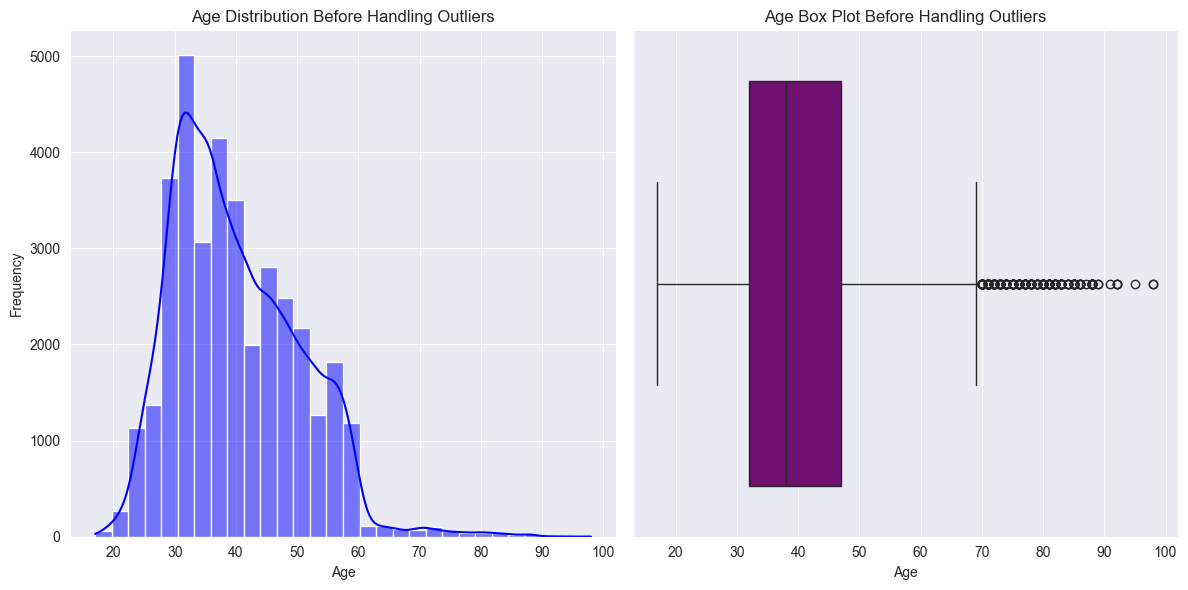

In [24]:
# Visualize the 'age' column before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution Before Handling Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'], color='purple')
plt.title('Age Box Plot Before Handling Outliers')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

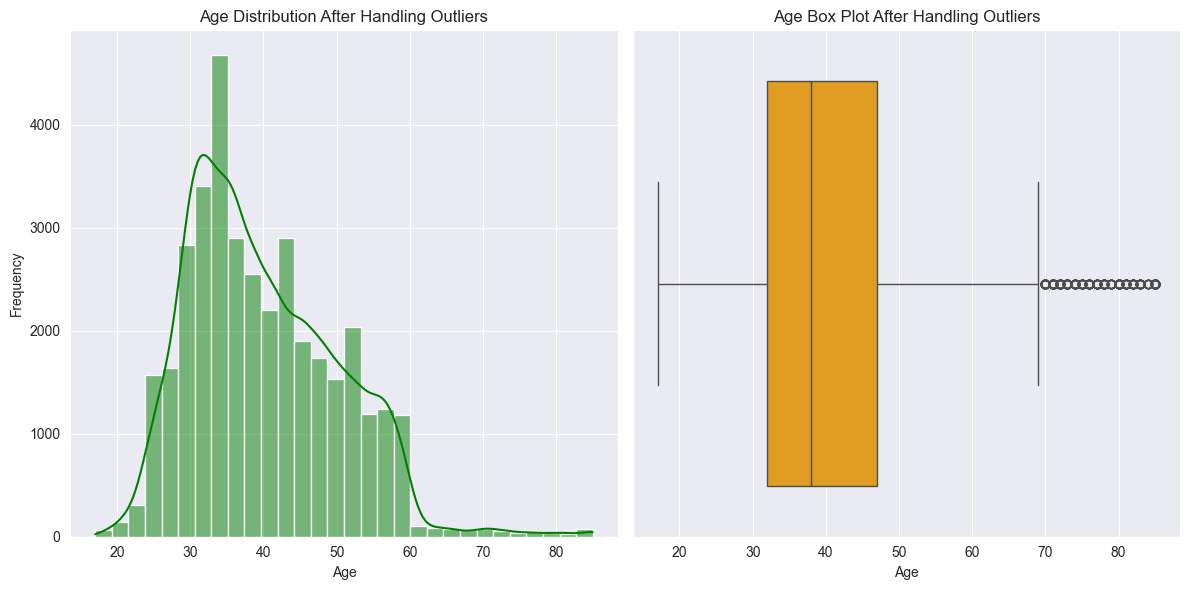

In [56]:
# Cap the ages above 85 to 85
df['age'] = df['age'].apply(lambda x: 85 if x > 85 else x)

# Visualize the 'age' column after handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True, bins=30, color='green')
plt.title('Age Distribution After Handling Outliers')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['age'], color='orange')
plt.title('Age Box Plot After Handling Outliers')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [57]:
# Verify the changes
print("\nAge column summary after capping outliers:")
print(df['age'].describe())


Age column summary after capping outliers:
count    36707.000000
mean        39.984008
std         10.268434
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         85.000000
Name: age, dtype: float64


In [58]:
# 2. Handle outliers in the 'campaign' column
print("\nCampaign column summary before handling outliers:")
print(df['campaign'].describe())


Campaign column summary before handling outliers:
count    36707.000000
mean         2.628245
std          2.867490
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64


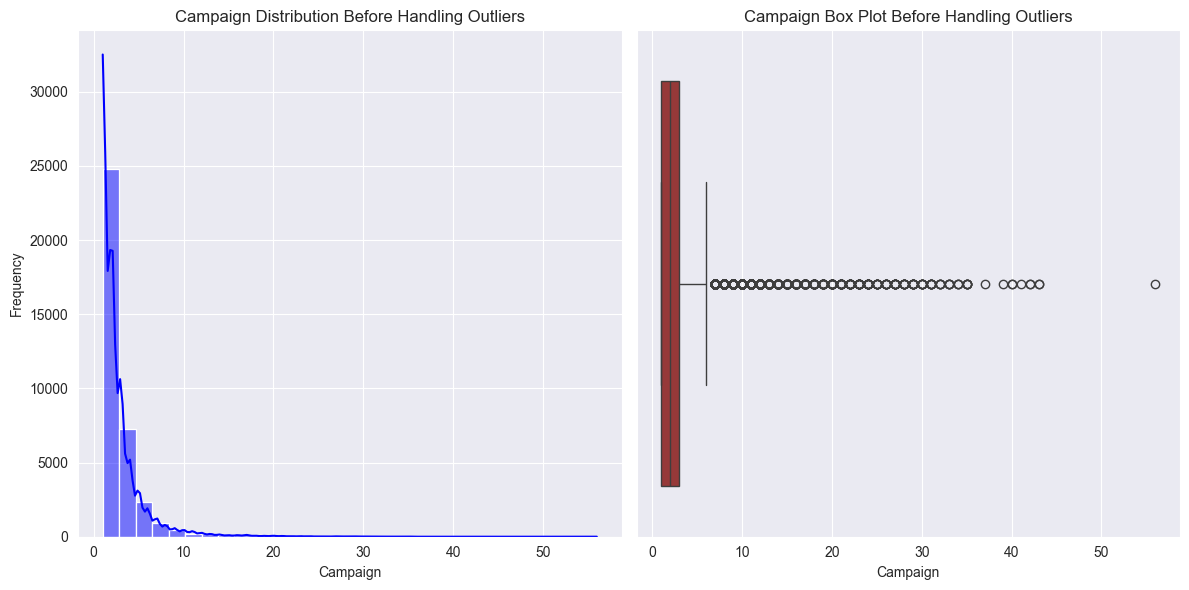

In [59]:
# Visualize the 'campaign' column before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['campaign'], kde=True, bins=30, color='blue')
plt.title('Campaign Distribution Before Handling Outliers')
plt.xlabel('Campaign')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['campaign'], color='brown')
plt.title('Campaign Box Plot Before Handling Outliers')
plt.xlabel('Campaign')

plt.tight_layout()
plt.show()

In [60]:
# Cap the campaign values above 10 to 10
df['campaign'] = df['campaign'].apply(lambda x: 10 if x > 10 else x)

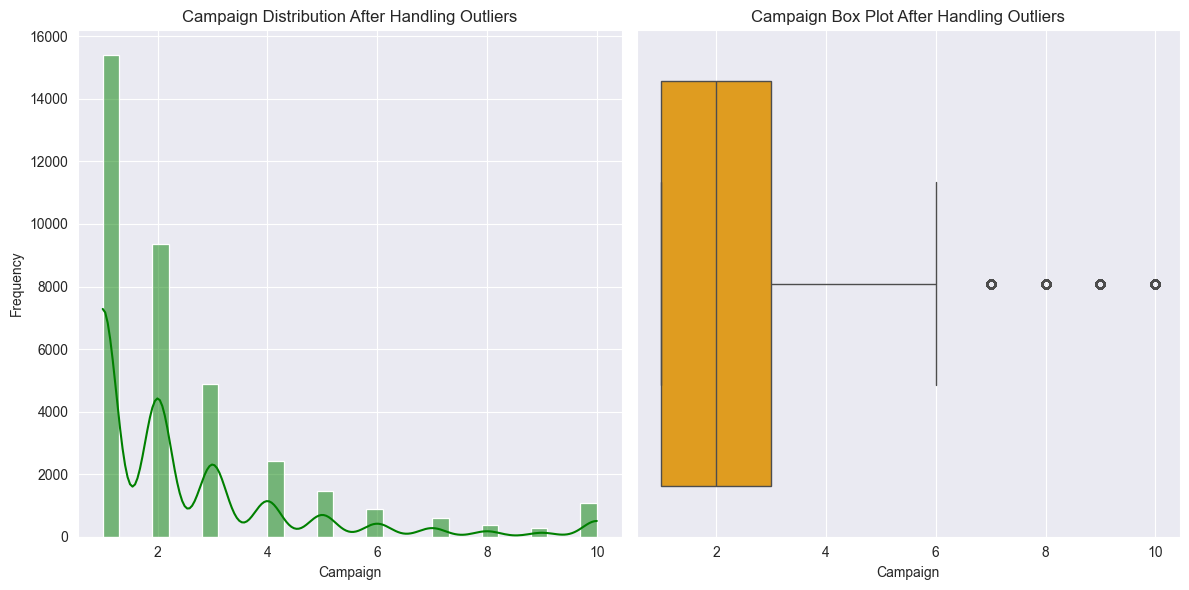

In [61]:
# Visualize the 'campaign' column after handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['campaign'], kde=True, bins=30, color='green')
plt.title('Campaign Distribution After Handling Outliers')
plt.xlabel('Campaign')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['campaign'], color='orange')
plt.title('Campaign Box Plot After Handling Outliers')
plt.xlabel('Campaign')

plt.tight_layout()
plt.show()

In [62]:
# Verify the changes
print("\nCampaign column summary after handling outliers:")
print(df['campaign'].describe())


Campaign column summary after handling outliers:
count    36707.000000
mean         2.483750
std          2.073902
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: campaign, dtype: float64


In [65]:
# Save the updated dataset to 'Updated_cleaned_data_no_outliers_before.csv'
output_file_path = 'Processed data in each step/bank_data_cleaned_without_outliers.csv'
df.to_csv(output_file_path, index=False)
print("Updated dataset with handled outliers saved as bank_data_cleaned_without_outliers.csv" )

Updated dataset with handled outliers saved as bank_data_cleaned_without_outliers.csv


In [72]:
data_url = 'https://raw.githubusercontent.com/LahiWeer/2330902-ML_CW/refs/heads/master/Preprocessing/Processed%20data%20in%20each%20step/processed_bank_data_final.csv'
df = pd.read_csv('Processed data in each step/bank_data_cleaned_without_outliers.csv')

In [73]:
print(f"\nTotal rows in the original DataFrame: {len(df)}")

y
0    32636
1     4071
Name: count, dtype: int64

Total rows in the original DataFrame: 36707


In [74]:
# Find duplicate rows and mark the first occurrence index for duplicates
duplicates = df[df.duplicated(keep=False)]  # Get all duplicated rows

# Add a new column 'is_duplicate' and 'duplicate_with' to highlight duplicates and show their first occurrence
df['is_duplicate'] = ''
df['duplicate_with'] = ''

# Get the index of the first occurrence of each duplicate
first_occurrence_index = df[df.duplicated(keep='first')].index

# Loop through the DataFrame to mark duplicates and their first occurrence
for idx in first_occurrence_index:
    # Find the first occurrence index
    first_occurrence = df[df.iloc[:, :].eq(df.iloc[idx, :]).all(axis=1)].index[0]

    # Mark the duplicate row and the first occurrence
    df.at[idx, 'is_duplicate'] = 'Duplicate'
    df.at[idx, 'duplicate_with'] = f"Row {first_occurrence}"

In [75]:
# Display the DataFrame with the new 'is_duplicate' and 'duplicate_with' columns
print("\nDataFrame with 'is_duplicate' and 'duplicate_with' columns:")
print(df.head())  # Display the first few rows of the updated DataFrame


DataFrame with 'is_duplicate' and 'duplicate_with' columns:
   age  job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
0   56                0                 0              1               0   
1   57                0                 0              0               0   
2   37                0                 0              0               0   
3   40                0                 0              0               0   
4   56                0                 0              0               0   

   job_retired  job_self-employed  job_services  job_student  job_technician  \
0            0                  0             0            0               0   
1            0                  0             1            0               0   
2            0                  0             1            0               0   
3            0                  0             0            0               0   
4            0                  0             1            0               0   

 

In [76]:
# Count duplicates
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 280


In [77]:
# Save the updated DataFrame with the new columns to a CSV file
output_file_path = 'For Reference/highlighted_duplicates_with_row_numbers.csv'
df.to_csv(output_file_path, index=False)
print(f"\nUpdated DataFrame saved to: {output_file_path}")


Updated DataFrame saved to: highlighted_duplicates_with_row_numbers.csv


In [78]:
# Remove the rows that are marked as duplicates
df_filtered = df[df['is_duplicate'] != 'Duplicate']

# Count the total number of rows after removing duplicates
total_rows_after_removal = df_filtered.shape[0]
print(f"\nTotal number of rows after removing duplicates: {total_rows_after_removal}")

# Save the filtered DataFrame (without duplicates) to the original file or a new file
filtered_file_path = 'Processed data in each step/bank_data_cleaned_without_duplicates.csv'
df_filtered.to_csv(filtered_file_path, index=False)
print("Filtered DataFrame (without duplicates) saved to bank_data_cleaned_without_duplicates.csv")


Total number of rows after removing duplicates: 34912

Filtered DataFrame (without duplicates) saved to: bank_data_cleaned_without_duplicates.csv


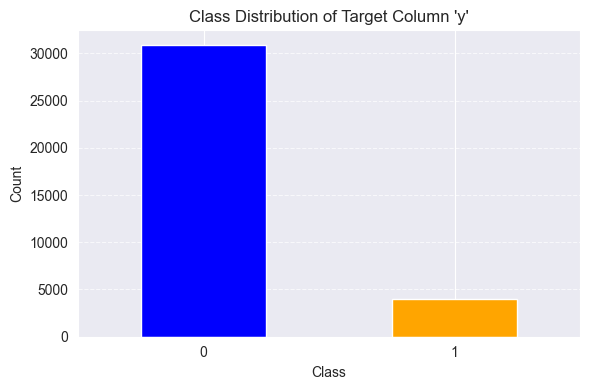

y
0    30883
1     4029
Name: count, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_url = "https://raw.githubusercontent.com/LahiWeer/2330902-ML_CW/refs/heads/master/Preprocessing/Processed%20data%20in%20each%20step/bank_data_cleaned_without_duplicates.csv"
data = pd.read_csv(file_url)

# Target column
target_column = "y"

# Calculate the class distribution
class_counts = data[target_column].value_counts()

# Plot the bar chart
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution of Target Column 'y'")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(data['y'].value_counts())

In [20]:
import pandas as pd
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(original_file, target_column, output_file):
    # Step 1: Load the Original Dataset
    data = pd.read_csv(original_file)
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Step 2: Analyze Class Distribution
    class_counts = y.value_counts()
    count_y0, count_y1 = class_counts[0], class_counts[1]
    rows_to_add_y1 = count_y0 - count_y1

    # Step 3: Check if Resampling is Required
    if rows_to_add_y1 <= 0:
        print("Dataset is already balanced.")
        data.to_csv(output_file, index=False)
        return

    # Step 4: Reapply SMOTE to Generate Synthetic Data
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_data[target_column] = y_resampled

    # Combine the original data and the resampled data
    combined_data = pd.concat([data, resampled_data], ignore_index=True)

    # Remove duplicates using drop_duplicates (keeping the first occurrence)
    combined_data = combined_data.drop_duplicates(keep='first')

    # Step 5: Check Final Balance and Reapply SMOTE if Necessary
    while True:
        final_class_counts = combined_data[target_column].value_counts()
        count_y0, count_y1 = final_class_counts[0], final_class_counts[1]

        if count_y0 == count_y1:
            break  # Dataset is balanced; no further action required.

        # Reapply SMOTE to balance the dataset
        X = combined_data.drop(columns=[target_column])
        y = combined_data[target_column]
        X_resampled, y_resampled = smote.fit_resample(X, y)
        resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
        resampled_data[target_column] = y_resampled

        # Filter the newly generated y == 1 rows
        resampled_data_y1 = resampled_data[resampled_data[target_column] == 1]

        # Combine the original data and newly generated y == 1 rows
        combined_data = pd.concat([combined_data, resampled_data_y1], ignore_index=True)

        # Remove duplicates using drop_duplicates (keeping the first occurrence)
        combined_data = combined_data.drop_duplicates(keep='first')

        # Shuffle the dataset
        combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

        # Save the updated dataset
        combined_data.to_csv(output_file, index=False)

    # Step 8: Verify Final Class Distribution
    final_class_counts = combined_data[target_column].value_counts()
    print(f"Final Class Distribution:\n{final_class_counts}")
    print(f"Balanced dataset saved to '{output_file}'.")

# Input file paths and target column
original_file = "../Preprocessing/Processed data in each step/bank_data_cleaned_without_duplicates.csv"
output_file = "resampled_and_original_data.csv"
target_column = "y"

# Balance the dataset
balance_dataset_with_smote(original_file, target_column, output_file)

Final Class Distribution:
y
1    30883
0    30883
Name: count, dtype: int64
Balanced dataset saved to 'resampled_and_original_data.csv'.


In [21]:
check_equal_data = pd.read_csv("resampled_and_original_data.csv")
check_equal_data['y'].value_counts()

y
1    30883
0    30883
Name: count, dtype: int64

In [22]:
# Find duplicate rows
duplicates = check_equal_data[check_equal_data.duplicated(keep=False)]  # Get all duplicated rows

# Count duplicates
duplicate_count = check_equal_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0
